In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from datetime import date
from scipy import *
import itertools
import os

import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import *
from sklearn import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import * 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import *

Using TensorFlow backend.


In [2]:
import os, os.path

homePath_train = "data/"
num_classes = 36

for folder in os.listdir(homePath_train):
    path = homePath_train + folder + "/"
    print("Digit ", folder, ": ", len([name for name in os.listdir(path) 
            if os.path.isfile(os.path.join(path, name))]), "images...")

Digit  0 :  4132 images...
Digit  1 :  4684 images...
Digit  2 :  4177 images...
Digit  3 :  4351 images...
Digit  4 :  4072 images...
Digit  5 :  3795 images...
Digit  6 :  4137 images...
Digit  7 :  4401 images...
Digit  8 :  4063 images...
Digit  9 :  4188 images...
Digit  A :  314 images...
Digit  B :  440 images...
Digit  C :  417 images...
Digit  D :  424 images...
Digit  E :  373 images...
Digit  F :  405 images...
Digit  G :  345 images...
DigitH :  296 images...
Digit  I :  296 images...
Digit  J :  323 images...
Digit  K :  256 images...
Digit  L :  285 images...
Digit  M :  224 images...
Digit  N :  252 images...
Digit  O :  307 images...
Digit  P :  319 images...
Digit  Q :  258 images...
Digit  R :  260 images...
Digit  S :  309 images...
Digit  T :  320 images...
Digit  U :  276 images...
Digit  V :  295 images...
Digit  W :  205 images...
Digit  X :  294 images...
Digit  Y :  268 images...
Digit  Z :  246 images...


In [3]:
import string
def split(word): 
    return [char for char in word]  
digits = [str(i) for i in range(0,10)]
chars = [str(i) for i in split(string.ascii_uppercase)]
chars = digits + chars
print(chars)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:
# ham xu li du lieu
def preprocessdata(homePath):
    data=[]
    label=[]
    for i, char in enumerate(chars):
        imgPath = homePath + char + "/"
        print(imgPath)
        imgFiles = os.listdir(imgPath)
        count = 0
        for image in imgFiles:
            if(count < 246):
                img = cv2.imread(imgPath+ image,0)
                data.append(img)
                label.append(i)
                count += 1
        print(count, "images")
    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

In [5]:
x, y = preprocessdata(homePath_train)

data/0/
246  images
data/1/
246  images
data/2/
246  images
data/3/
246  images
data/4/
246  images
data/5/
246  images
data/6/
246  images
data/7/
246  images
data/8/
246  images
data/9/
246  images
data/A/
246  images
data/B/
246  images
data/C/
246  images
data/D/
246  images
data/E/
246  images
data/F/
246  images
data/G/
246  images
data/H/
246  images
data/I/
246  images
data/J/
246  images
data/K/
246  images
data/L/
246  images
data/M/
224  images
data/N/
246  images
data/O/
246  images
data/P/
246  images
data/Q/
246  images
data/R/
246  images
data/S/
246  images
data/T/
246  images
data/U/
246  images
data/V/
246  images
data/W/
205 images
data/X/
246  images
data/Y/
246  images
data/Z/
246  images


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train = reshape(X_train,(-1,28,28,1))
y_train = to_categorical(y_train, num_classes = num_classes)
X_test = reshape(X_test,(-1,28,28,1))
y_test = to_categorical(y_test, num_classes = num_classes)
print(X_train.shape, y_train.shape)

(7034, 28, 28, 1) (7034, 36)


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
res = model.fit(X_train, y_train, validation_split=0.2,shuffle=True,
                 batch_size=32, epochs=12, verbose=1)
model.save_weights('digit-cls.h5')

Train on 5627 samples, validate on 1407 samples
Epoch 1/12
5627/5627 [==============================] - 7s 1ms/step - loss: 2.4605 - accuracy: 0.4622 - val_loss: 0.9190 - val_accuracy: 0.8650
Epoch 2/12
5627/5627 [==============================] - 7s 1ms/step - loss: 0.5707 - accuracy: 0.9227 - val_loss: 0.4242 - val_accuracy: 0.9268
Epoch 3/12
5627/5627 [==============================] - 7s 1ms/step - loss: 0.2920 - accuracy: 0.9621 - val_loss: 0.2722 - val_accuracy: 0.9531
Epoch 4/12
5627/5627 [==============================] - 7s 1ms/step - loss: 0.1786 - accuracy: 0.9776 - val_loss: 0.2035 - val_accuracy: 0.9581
Epoch 5/12
5627/5627 [==============================] - 7s 1ms/step - loss: 0.1192 - accuracy: 0.9865 - val_loss: 0.1586 - val_accuracy: 0.9744
Epoch 6/12
5627/5627 [==============================] - 7s 1ms/step - loss: 0.0841 - accuracy: 0.9908 - val_loss: 0.1305 - val_accuracy: 0.9744
Epoch 7/12
5627/5627 [==============================] - 7s 1ms/step - loss: 0.0608 - acc

Loss:  0.0852554919957403
Accuracy:  0.9761227965354919


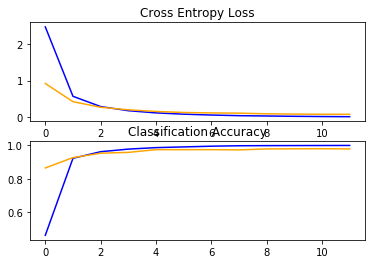

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Loss: ", score[0])
print("Accuracy: ", score[1])
# plot diagnostic learning curves
import sys
from matplotlib import pyplot
%matplotlib inline
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.show()
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
summarize_diagnostics(res)